# Write a program to do following:


1.   Apply Data pre-processing
2.   Perform data-preparation (Train-Test Split).
3.   Apply Machine Learning Algorithm.
4.   Evaluate Model.
5.   Apply Cross-Validation and Evaluate Mode



In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Read Dataset

df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Data Preprocessing
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train-Test Split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [7]:
# Appling K-Means Clustering
wcss =[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

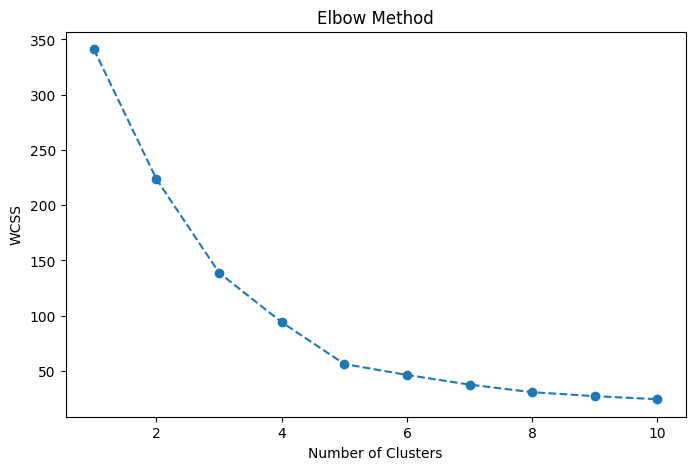

In [8]:
# Elbow Method to determine optimal k
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Choosing optimal k (based on the elbow point, usually around 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [29]:
kmeans_labels = kmeans.predict(X_test)

In [30]:
# Evaluating K-Means
silhouette_kmeans = silhouette_score(X_test, kmeans_labels)
print("Silhouette Score (K-Means):", silhouette_kmeans)

Silhouette Score (K-Means): 0.566618490320996


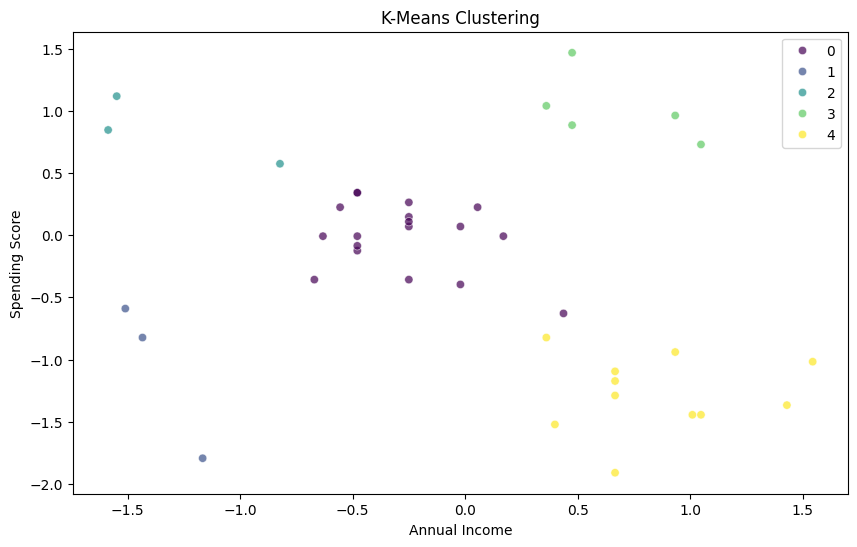

In [31]:
# Visualizing Clusters (K-Means)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

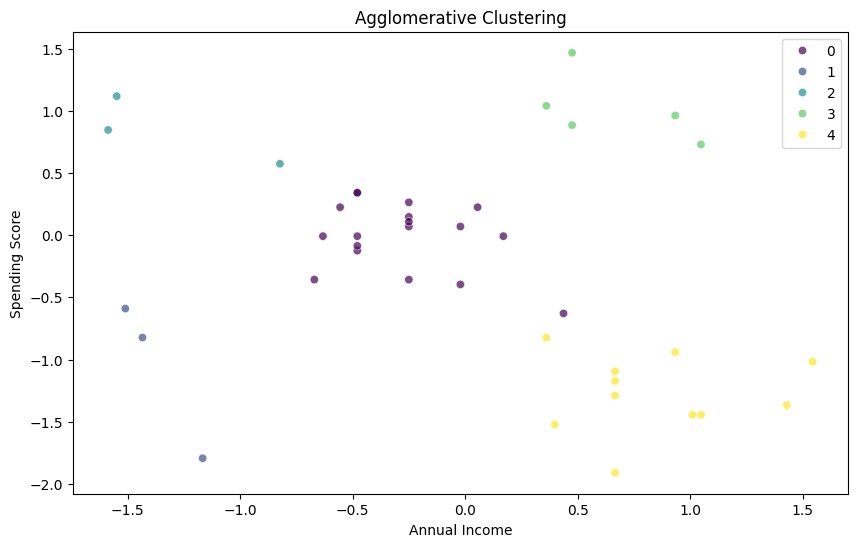

In [32]:
# Visualizing Clusters (Agglomerative Clustering)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [33]:
# Cross-validation is not directly applicable to clustering, but we can check consistency accross different splits
cross_val_scores = []
for _ in range(5):
  X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=np.random.randint(0, 100))
  kmeans.fit(X_train)
  labels = kmeans.predict(X_test)
  score = silhouette_score(X_test, labels)
  cross_val_scores.append(score)

In [35]:
print(f"Cross-Validation Silhouette Scores for K-Means: {cross_val_scores}")
print(f"Average Cross-Validation Silhouette Score: {np.mean(cross_val_scores)}")

Cross-Validation Silhouette Scores for K-Means: [0.49305709655552493, 0.5334524907420632, 0.5749779001690001, 0.5881510844700999, 0.5425174422704039]
Average Cross-Validation Silhouette Score: 0.5464312028414184
